Problem statement
==

It is important for Bank and Lenders to ensure that they don’t give loans to people who are likely to default. The Home Equity data set contains information related to home equity for about six thousand loans given out in past. This data contains various information regarding customer’s situation at the time of loan and also contains a column 'BAD' which indicates whether the customer later on defaulted on the loan. We can use this data set along with the variable ‘BAD’ to train machine learning models which would help us predict the likelihood of someone defaulting the loan in future based on their current situation.

This notebook provides an analysis of the Home Equity dataset and proposes the best model to use for predicting people who may default by analysing their current situation. This problem can be categorized as binary classification problem as the model will predict whether a person would default.


Hypothesis Generation
==

Some of the factors which can affect the BAD (target variable for this loan defaulter problem) are:
* Mortgage due: Applicants with less amount left on mortgage should have higher chances of not defaulting on future loans
* Loan amount: Applicants with less amount of loan requested should have higher chances of not defaulting on future loan
* Value of current property: If the value of the current property is less then there should be less chances of being a defaulter on future loans
* Reason: The reason for taking out the loan might also have an impact on the chance of going in default
* Number of delinquent loans: If a person has already been delinquent in past for a number of times then there would be higher chances of default
* Number of derogatory reports: Derogatory reports are always a negative sign on the credit history and any number in this column should indicate high chance of defaulting in future
* Credit line age: This indicates the age of oldest credit approved and the older this is the less likely it will be for the customer to default
* Debt to income ratio: If a person has high debt with respect to income then it would be difficult for that person to pay back more debt so a high number in this would indicate a defaulter

Understanding the data
==

In [1]:
#import the packages

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../input")) #list the files in the input directory
df=pd.read_csv('../input/hmeq.csv') #import the dataset
columnNames = pd.Series(df.columns.values) # to check the columns/variables/features present in our data set

['hmeq.csv']


In [2]:
df.head(5) # to see the first 5 rows of dataset


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [3]:
df.shape #to look at the shape of the dataset

(5960, 13)

It shows that the dataset has 5960 rows(observations) and 13 columns (variables/features)

In [4]:
#descriptive statistics
description= df.describe(include='all') # to get the basic summary of all the numeric columns and frequency distribution of all the categorical columns.
description

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5708,5681,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,3928,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199497,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,NaN,NaN,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,NaN,NaN,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,NaN,NaN,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,NaN,NaN,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141


In [5]:
data_types=df.dtypes #to print data types for each variable
data_types

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

Missing Values
==

In [6]:
MissingData=df.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values') # the isnull() returns 1 if the value is null
MissingData

,Variables,Missing Values
0,BAD,0
1,LOAN,0
2,MORTDUE,518
3,VALUE,112
4,REASON,252
5,JOB,279
6,YOJ,515
7,DEROG,708
8,DELINQ,580
9,CLAGE,308


In [7]:
#dropping rows that have missing data
df.dropna(axis=0, how='any', inplace=True)
df


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,1,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
26,0,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827
34,0,2900,103949.0,112505.0,HomeImp,Office,1.0,0.0,0.0,96.102330,0.0,13.0,30.051136
35,0,2900,104373.0,120702.0,HomeImp,Office,2.0,0.0,0.0,101.540298,0.0,13.0,29.915859
36,1,2900,7750.0,67996.0,HomeImp,Other,16.0,3.0,0.0,122.204663,2.0,8.0,36.211348
37,1,2900,61962.0,70915.0,DebtCon,Mgr,2.0,0.0,0.0,282.801659,3.0,37.0,49.206396
38,0,3000,104570.0,121729.0,HomeImp,Office,2.0,0.0,0.0,85.884372,0.0,14.0,32.059783


Exploratory Data Analysis (EDA)
==

**Univariate Analysis**

In this analysis we examine each variable individually. For categorical features we can use bar plots which calculates the total count of each category in a particular variable. For numerical features we can use histograms or probability density plots to look at the distribution of the variable.

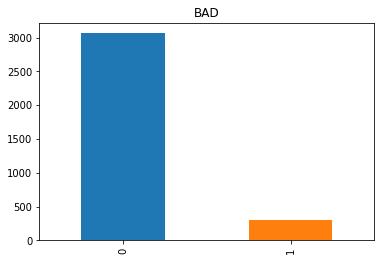

In [8]:
#Frequency distribution of target variable "BAD" and visualizing the target variable
df["BAD"].value_counts().plot.bar(title='BAD')

It shows that 20% are defaulters and 80% are non defulters

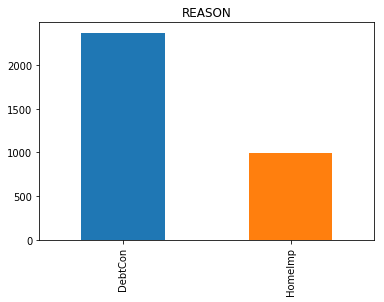

In [9]:
#visualizing the categorical variable REASON
REASON_count= df["REASON"].value_counts().rename_axis('REASON').reset_index(name='Total Count')
df["REASON"].value_counts().plot.bar(title='REASON')


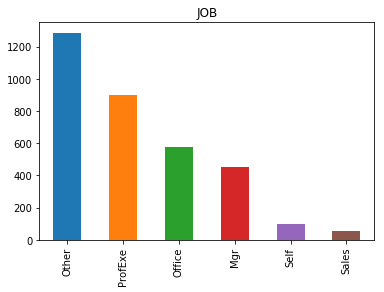

In [10]:
#visualizing the categorical variable JOB
JOB_count= df["JOB"].value_counts().rename_axis('JOB').reset_index(name='Total Count')
df["JOB"].value_counts().plot.bar(title='JOB')

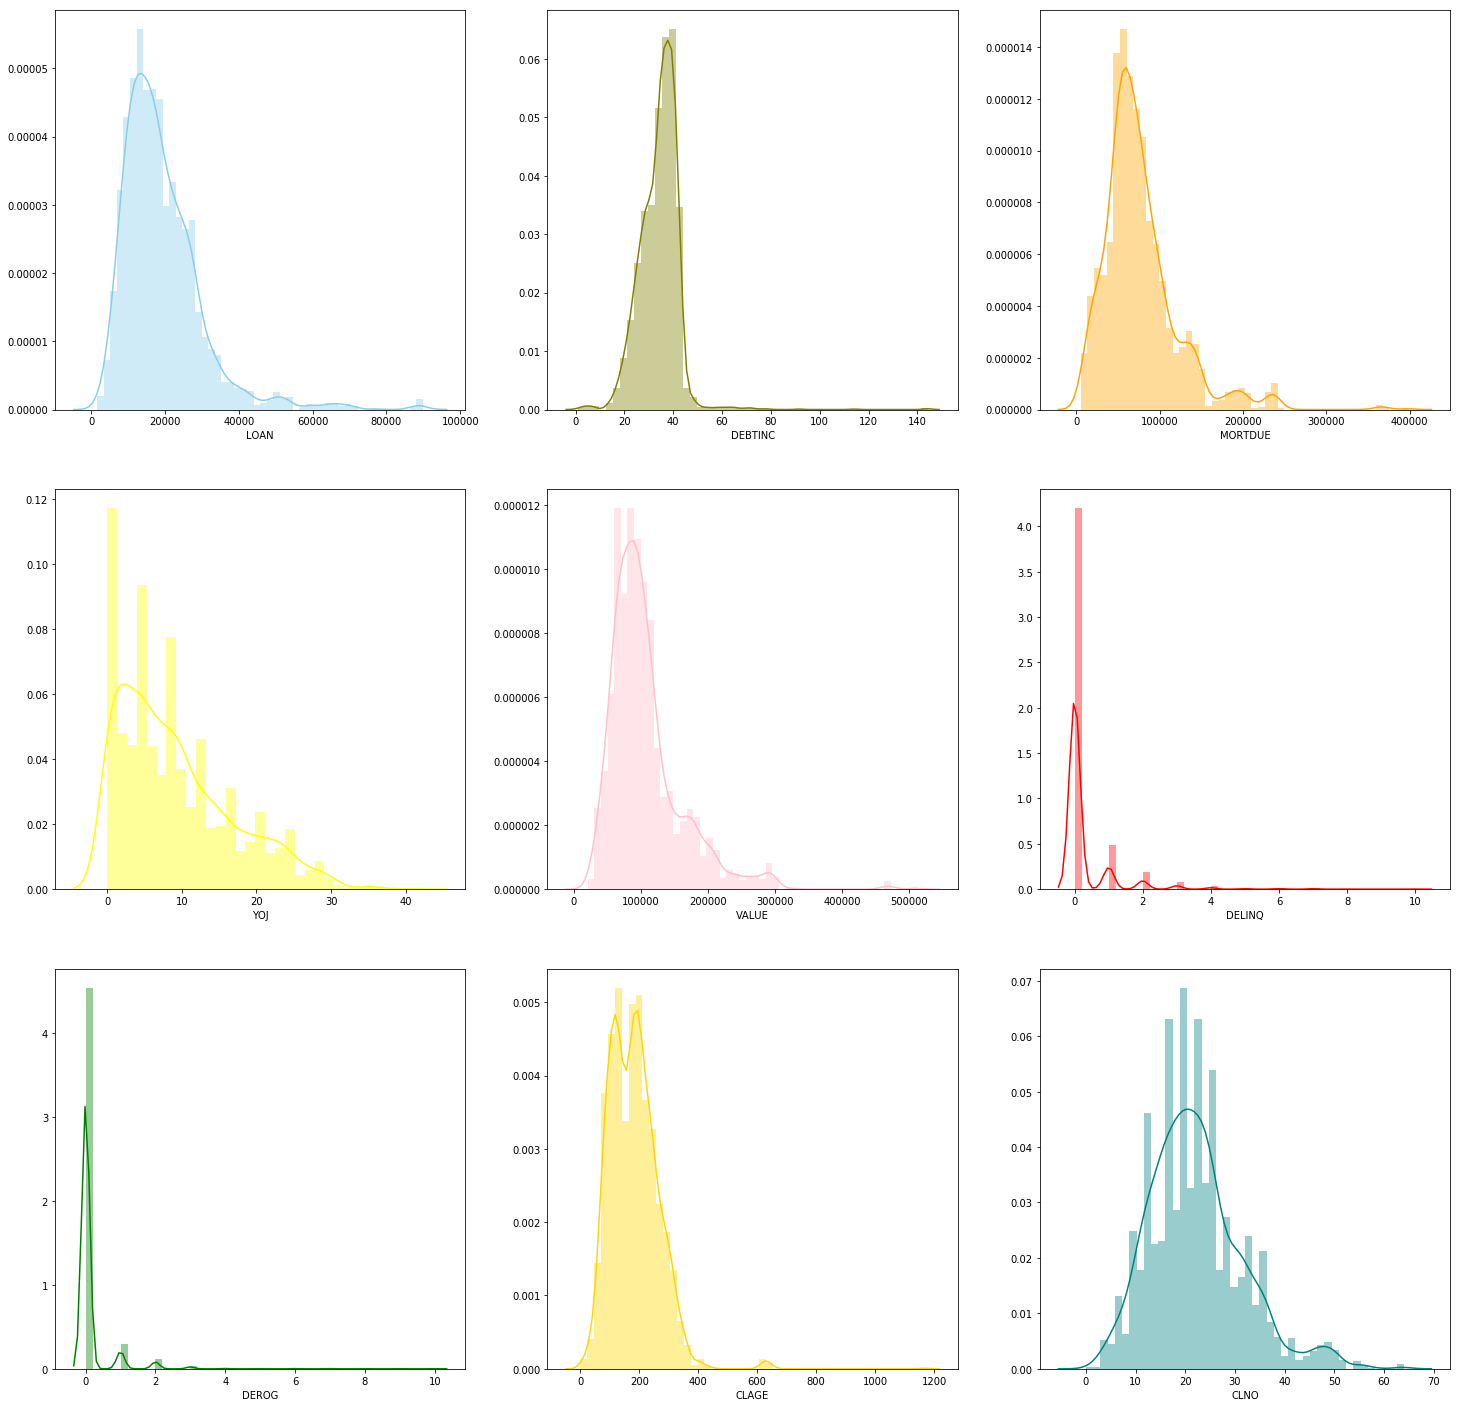

In [11]:
# visualizing numeric variables using seaborn
f, axes = plt.subplots(3, 3, figsize=(25,25))
sns.distplot( df["LOAN"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df["DEBTINC"] , color="olive", ax=axes[0, 1])
sns.distplot( df["MORTDUE"] , color="orange", ax=axes[0, 2])
sns.distplot( df["YOJ"] , color="yellow", ax=axes[1, 0])
sns.distplot( df["VALUE"] , color="pink", ax=axes[1, 1])
sns.distplot( df["DELINQ"] , color="red", ax=axes[1, 2])
sns.distplot( df["DEROG"] , color="green", ax=axes[2, 0])
sns.distplot( df["CLAGE"] , color="gold", ax=axes[2, 1])
sns.distplot( df["CLNO"] , color="teal", ax=axes[2, 2])

**Bivariate Analysis**

In this analysis we explore the relationship of each variable with respect to the target variable. We can also check our hypothesis using bivariate analysis.

**Categorical and Target Variable Relationship**

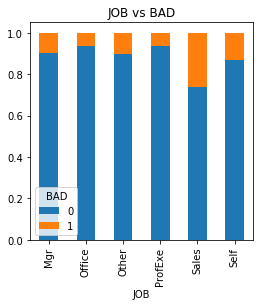

In [12]:

JOB=pd.crosstab(df['JOB'],df['BAD'])
JOB.div(JOB.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, title='JOB vs BAD', figsize=(4,4))


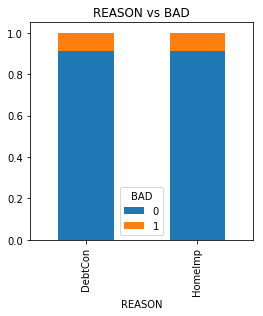

In [13]:
REASON=pd.crosstab(df['REASON'],df['BAD'])
REASON.div(REASON.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, title='REASON vs BAD', figsize=(4,4))

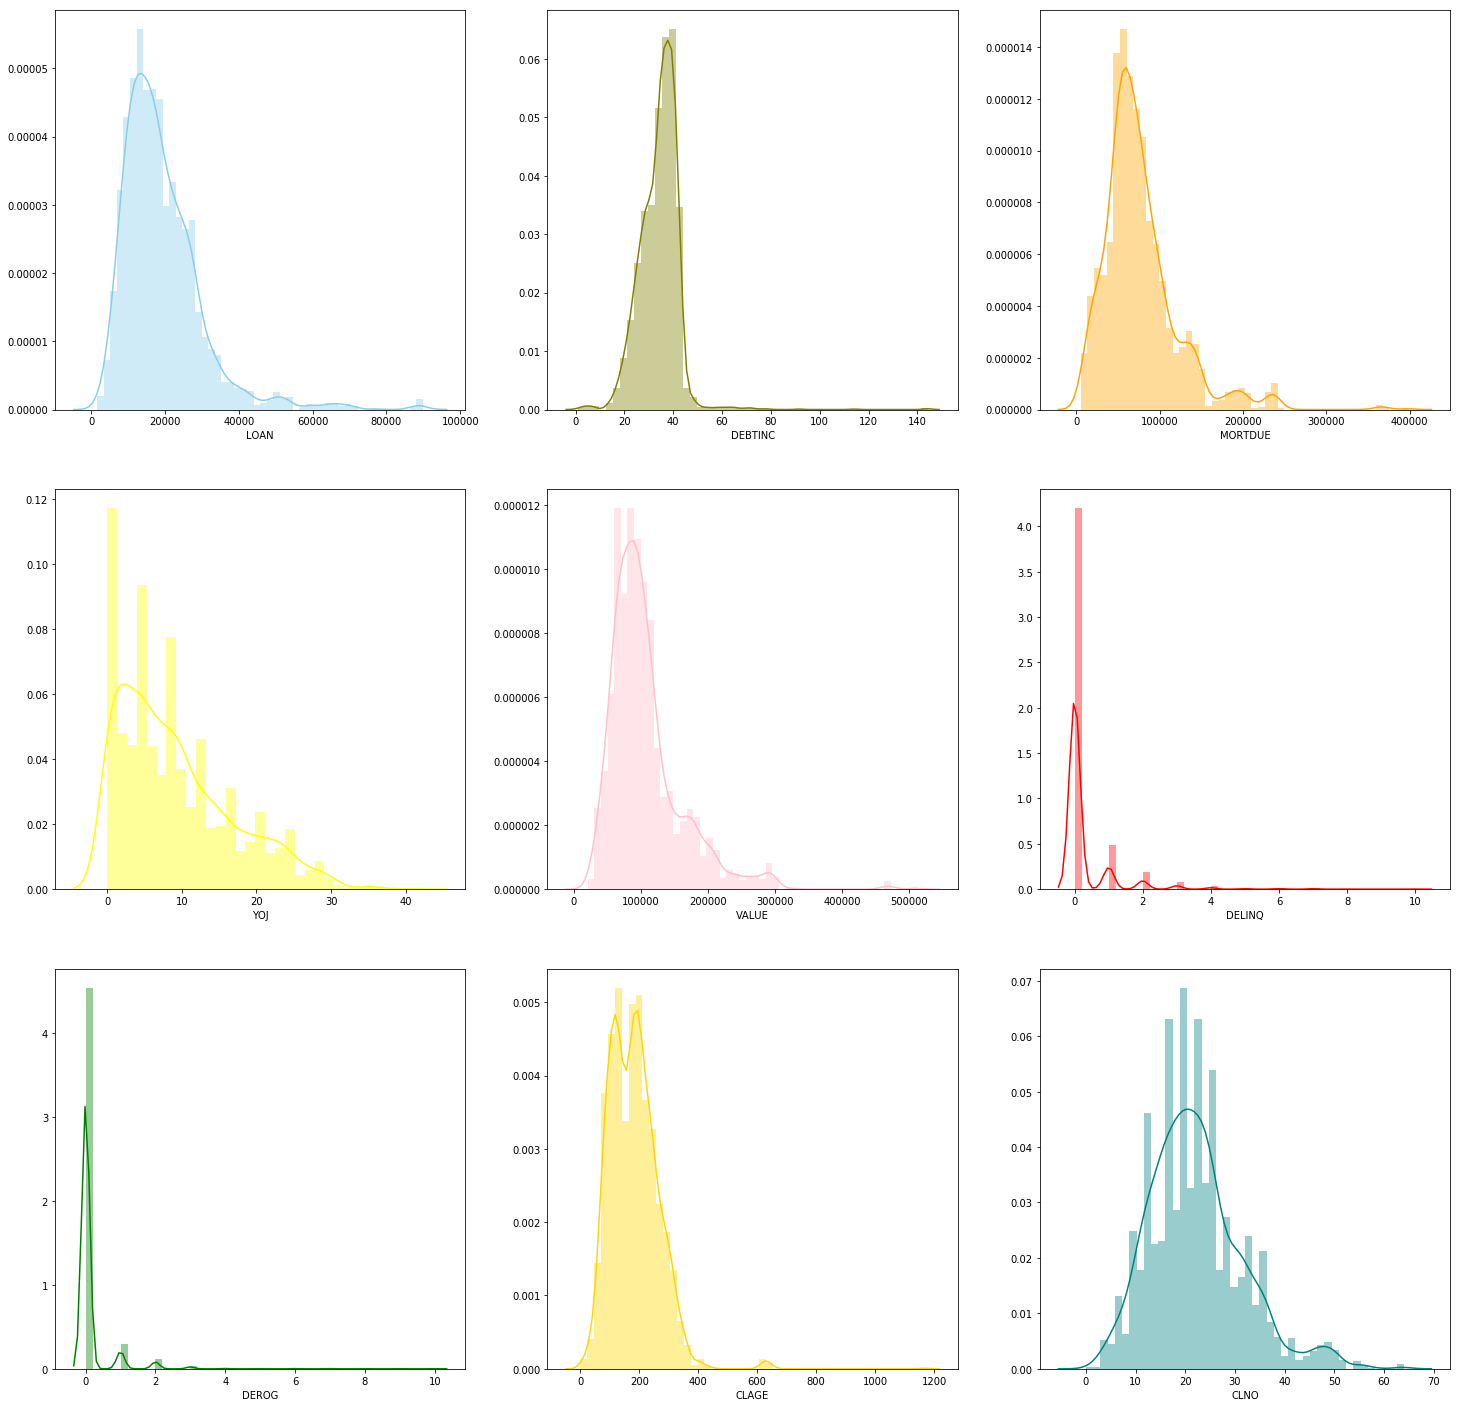

In [14]:
# visualizing numeric variables using seaborn
f, axes = plt.subplots(3, 3, figsize=(25,25))
sns.distplot( df["LOAN"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df["DEBTINC"] , color="olive", ax=axes[0, 1])
sns.distplot( df["MORTDUE"] , color="orange", ax=axes[0, 2])
sns.distplot( df["YOJ"] , color="yellow", ax=axes[1, 0])
sns.distplot( df["VALUE"] , color="pink", ax=axes[1, 1])
sns.distplot( df["DELINQ"] , color="red", ax=axes[1, 2])
sns.distplot( df["DEROG"] , color="green", ax=axes[2, 0])
sns.distplot( df["CLAGE"] , color="gold", ax=axes[2, 1])
sns.distplot( df["CLNO"] , color="teal", ax=axes[2, 2])

**Numeric and Target Variable Relationship**

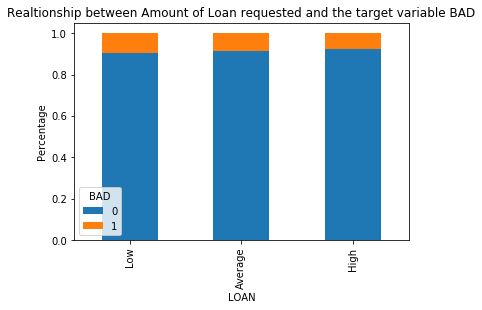

In [15]:

dfWithBin = df.copy()
bins=[0,15000,25000,90000] 
group=['Low','Average','High'] 
dfWithBin['LOAN_bin']=pd.cut(df['LOAN'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['LOAN_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Realtionship between Amount of Loan requested and the target variable BAD')
plt.xlabel('LOAN')
P= plt.ylabel('Percentage')

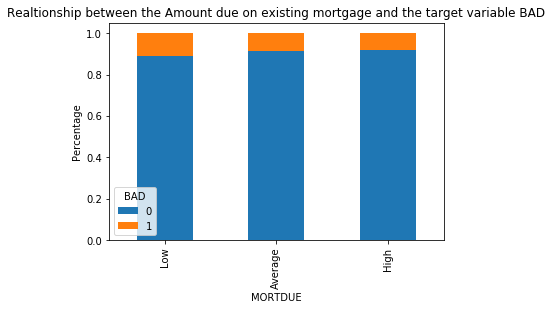

In [16]:
bins=[0,47000,92000,400000] 
group=['Low','Average','High'] 
dfWithBin['MORTDUE_bin']=pd.cut(dfWithBin['MORTDUE'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['MORTDUE_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Realtionship between the Amount due on existing mortgage and the target variable BAD')
plt.xlabel('MORTDUE')
P= plt.ylabel('Percentage')

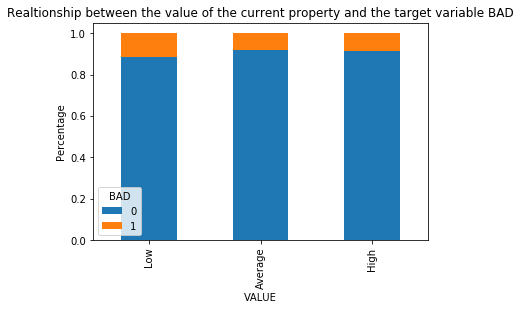

In [17]:
bins=[0,68000,120000,860000] 
group=['Low','Average','High'] 
dfWithBin['VALUE_bin']=pd.cut(dfWithBin['VALUE'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['VALUE_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Realtionship between the value of the current property and the target variable BAD')
plt.xlabel('VALUE')
P= plt.ylabel('Percentage')

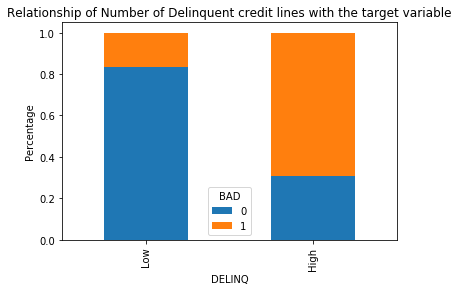

In [18]:
bins=[0,3,15] 
group=['Low','High'] 
dfWithBin['DELINQ_bin']=pd.cut(dfWithBin['DELINQ'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['DELINQ_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Relationship of Number of Delinquent credit lines with the target variable')
plt.xlabel('DELINQ')
P= plt.ylabel('Percentage')

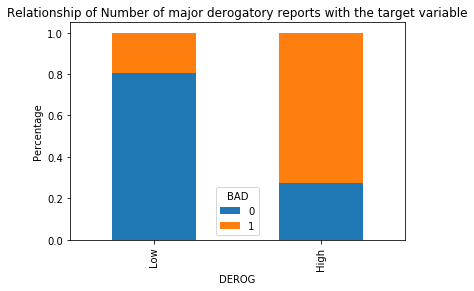

In [19]:
bins=[0,2,15] 
group=['Low','High'] 
dfWithBin['DEROG_bin']=pd.cut(dfWithBin['DEROG'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['DEROG_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Relationship of Number of major derogatory reports with the target variable')
plt.xlabel('DEROG')
P= plt.ylabel('Percentage')

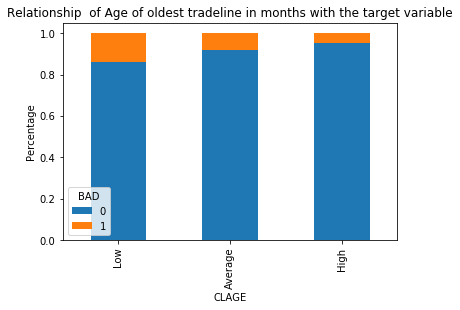

In [20]:
bins=[0,120,230,1170] 
group=['Low','Average','High'] 
dfWithBin['CLAGE_bin']=pd.cut(dfWithBin['CLAGE'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['CLAGE_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Relationship  of Age of oldest tradeline in months with the target variable')
plt.xlabel('CLAGE')
P= plt.ylabel('Percentage')

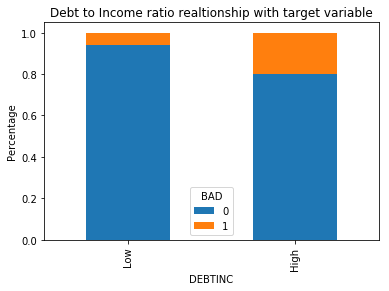

In [21]:
bins=[0,40,204] 
group=['Low','High'] 
dfWithBin['DEBTINC_bin']=pd.cut(dfWithBin['DEBTINC'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['DEBTINC_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Debt to Income ratio realtionship with target variable')
plt.xlabel('DEBTINC')
P= plt.ylabel('Percentage')

These stacked bar plots show:

* The proportion of defaulters or non defaulters in each category of categorical variables
* The proportion for defaulters having Sales job is higher
* There is nothing significant that we can infer from the number of defaulters having a different reason for taking out loan

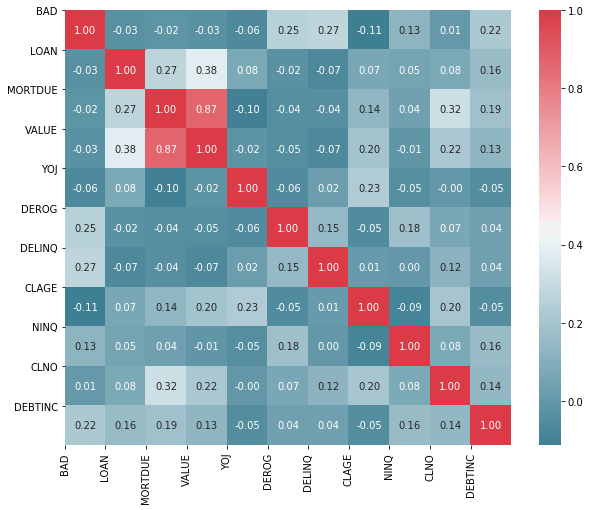

In [22]:
#Create Correlation matrix
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10,8))
#Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

This correlation matrix shows the correlation between all the numeric variables.

The interesting correlation that we can see is that BAD (target variable) is positively correlated with DELINQ, DEROG and DEBTINC

Data Preprocessing
==

**Encoding**

As many of the Machine Learning models takes only the numerical values as input so we have to convert categorical columns to numeric
Dummy variable turns categorical variables into a series of 0 and 1, making them much easier to compare

In [23]:
#encoding
df=pd.get_dummies(df, columns=['REASON','JOB'])
df


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0,1,0,0,1,0,0,0
7,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,0,1,0,0,1,0,0,0
19,0,2300,102370.0,120953.0,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503,0,1,0,1,0,0,0,0
25,1,2400,34863.0,47471.0,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601,0,1,1,0,0,0,0,0
26,0,2400,98449.0,117195.0,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827,0,1,0,1,0,0,0,0
34,0,2900,103949.0,112505.0,1.0,0.0,0.0,96.102330,0.0,13.0,30.051136,0,1,0,1,0,0,0,0
35,0,2900,104373.0,120702.0,2.0,0.0,0.0,101.540298,0.0,13.0,29.915859,0,1,0,1,0,0,0,0
36,1,2900,7750.0,67996.0,16.0,3.0,0.0,122.204663,2.0,8.0,36.211348,0,1,0,0,1,0,0,0
37,1,2900,61962.0,70915.0,2.0,0.0,0.0,282.801659,3.0,37.0,49.206396,1,0,1,0,0,0,0,0
38,0,3000,104570.0,121729.0,2.0,0.0,0.0,85.884372,0.0,14.0,32.059783,0,1,0,1,0,0,0,0


 We can use scikit-learn (sklearn) for making different models. It requires the target variable in a separate dataset 

In [24]:
# Extract independent and target variables
X = df.drop(['BAD'], axis=1)
y = df['BAD']

**Data Normalization**

some of the columns in X have large variance in the numeric data in them so standard scaling is done to normalize them

In [25]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(X), columns=X.columns)

Logistic Regression
==

Logistic regression or the logit model is one of the classification techniques and is defined as a type of regression model where the target variable is binary for example having only two values such as default /not default, fraud /not fraud etc.In logistic regression, the probability of a binary outcome is predicted.
For building the logistic regression model split the dataset into train and test. Also used KFold cross validation to randomly split the entire dataset into k-folds

Feature Selection using RFE for Logistic Regression Model
==

Feature selection is a process of selecting the features in the data that contribute the most to predict the target attribute. The Recursive Feature Elimination (RFE) method is a feature selection approach. It works by recursively removing attributes and building a model on remaining attributes. Some of its benefits are:
* reduces overfitting
* Improves accuracy
* Reduces training time



In [26]:
#RFE with the logistic regression algorithm to select the top 4 features. 
#import classifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression()
rfe = RFE(model, 4)
fit = rfe.fit(X, y)
no_of_features = fit.n_features_
support_features = fit.support_
ranking_features = fit.ranking_
print("Num Features: %d" % (no_of_features))
print("Selected Features: %s" % (support_features))
print("Feature Ranking: %s" % (ranking_features))
X_sub = X.iloc[:,support_features] #updated X with the top 4 features

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Num Features: 4
Selected Features: [False False False False  True  True  True False False  True False False
 False False False False False False]
Feature Ranking: [ 6  8  7 10  1  1  1  4  3  1 11 14 12  2 13 15  5  9]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The RFE returns the top 4 features/independent variables as: DEROG,DELINQ,CLAGE,DEBTINC

Therefore, X= DEROG,DELINQ,CLAGE,DEBTINC
                     Y= BAD

In random forest model and decision trees, variable/feature selection is done automatically by splitting the top nodes based on the most important features of the data

Performance/Evaluation metrics of the models
==

**Confusion Matrix**

A confusion matrix is a summary of prediction results on a classification problem. A confusion matrix for binary classification shows the four different outcomes: true positive, false positive, true negative, and false negative. The actual values form the columns, and the predicted values (labels) form the rows.

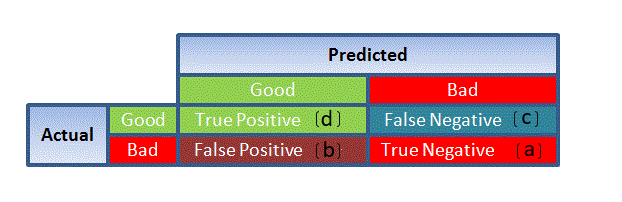

**Accuracy**

•	True Positive - Targets which are actually true(Y) and we also predicted them true(Y)
•	True Negative - Targets which are actually false(N) and we also predicted them false(N)
•	False Positive - Targets which are actually false(N) but we predicted them true(T)
•	False Negative - Targets which are actually true(T) but we predicted them false(N)
We can calculate the accuracy of the model using these values of confusion matrix. The accuracy is given by:

Accuracy= TP + TN / (TP + TN + FP + FN)

**Precision **

Precision is a measure of correctness achieved in true prediction i.e. it calculates out of observations labeled as true, how many of them are actually true.Precision is a good measure to determine, when the costs of False Positive is high.

Precision = TP / (TP + FP)

**Recall**

Recall is a measure of actual observations which are predicted correctly i.e. it calculates how many observations of true class are labeled correctly. It is also known as ‘Sensitivity’. Precision is a good measure to determine, when the costs of False Positive is high.

Recall = TP / (TP + FN)

**Specificity**

Specificity is a measure of how many observations of false class are labeled correctly.

Specificity = TN / (TN + FP)

Specificity and Sensitivity both plays an important role in deriving ROC curve.

**ROC curve**

Receiver Operating Characteristic(ROC) summarizes the model’s performance by calculating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity).
The area under curve (AUC) also called concordance index is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.


In [27]:
#splitting the data into test and train for logistic regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sub,y,random_state = 0) # default 25% test data
#import logistic regresiion model
from sklearn.linear_model import LogisticRegression
# create model (estimator) object
classifier = LogisticRegression()
# fit model to training data
classifier.fit(X_train,y_train)
#classifier performance on test set
classifier.score(X_test,y_test)
# make predictions
y_pred = classifier.predict(X_test)
y_score= classifier.predict_proba(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:

#import performance measure tools
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report
acs=accuracy_score(y_test,y_pred)
rs=recall_score(y_test,y_pred, average='macro') 
ps=precision_score(y_test,y_pred, average='macro') 
print("accuracy score : ",acs)
print("precision score : ",rs)
print("recall score : ",ps)
#print("Accuracy : %s" % "{0:.3%}".format(acs))
print(classification_report(y_test, y_pred))

accuracy score :  0.906064209274673
precision score :  0.5801866256457886
recall score :  0.8944531696173614
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       749
           1       0.88      0.16      0.28        92

    accuracy                           0.91       841
   macro avg       0.89      0.58      0.61       841
weighted avg       0.90      0.91      0.88       841



In [29]:
import itertools
def plot_confusion_matrix(cm,classes=[0,1],title='Confusion matrix without normalization', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix without normalization
[[747   2]
 [ 77  15]]


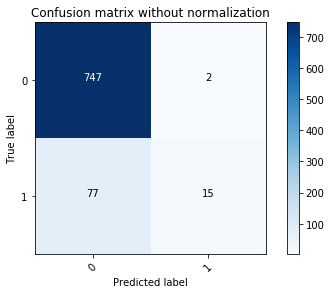

In [30]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
plt.show()


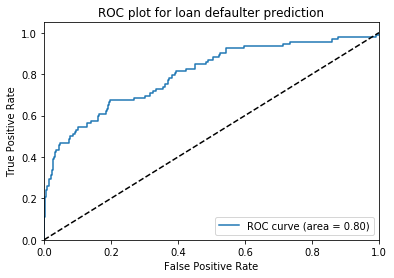

In [31]:
#ROC plot
from sklearn.metrics import roc_curve, auc
def plot_roc(y_test, y_score):
    fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC plot for loan defaulter prediction")
    plt.legend(loc="lower right")
    plt.show()
#Plot ROC
plot_roc(y_test, y_score)

K-Fold Cross Validation for Logistic Regression
==

Validation is a technique of reserving a particular sample of a dataset on which you do not train the model. It helps in analyzing how robust the model is to the unseen data
K-Folds Cross Validation is a validation technique in which we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.


In [32]:
# KFOLD
from statistics import mean, stdev

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score, cross_validate
logreg = LogisticRegression()
kf = KFold(n_splits=5,shuffle=True,random_state=1)
kf_scores = []
xmat = X_sub.as_matrix()
ymat = y.as_matrix()
for train_index, test_index in kf.split(xmat):
    X_train, y_train=xmat[train_index], ymat[train_index]
    logreg.fit(X_train, y_train)
    y_predicted=logreg.predict(X_test)
    kf_scores.append(accuracy_score(y_test, y_predicted))

print(kf_scores)

[0.9084423305588585, 0.9096313912009513, 0.9096313912009513, 0.9084423305588585, 0.9072532699167658]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

The mean validation accuracy for the logistic regression model is  0.909

KNN
==



In [33]:
#import KNN classifier
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()
#parameters of gridsearch for KNN:n_neighbors, weights
param_dict= {'n_neighbors':range(3,11,2),
             'weights':['uniform','distance'],
                       'p':[1,2,3,4,5]
                       }
#since this is binary classifier use odd for list of neighbours , with the range function we get k=3,5,7,9
#uniform means that every near neighbour will get the same weightage whether k =3,5,7 or 9
#p means the manhatten or eucledean or higher power distances
#grid search to find the best parameters
from sklearn.model_selection import GridSearchCV
best_model = GridSearchCV(model, param_dict, cv=5) 
best_model.fit(X_sub, y)
best_model.best_params_ #{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
best_model.best_score_  #best_score will give the mean score of 5 cv's which is 0.9304399524375743
ypred = best_model.predict(X_sub)
y_score= best_model.predict_proba(X_sub)

In [34]:
# import Performance measure
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
acs=accuracy_score(y,ypred) 
rs=recall_score(y,ypred, average='macro') 
ps=precision_score(y,ypred, average='macro') 
print("accuracy score : ",acs)
print("precision score : ",rs)
print("recall score : ",ps)

accuracy score :  0.9402497027348394
precision score :  0.6740208877284595
recall score :  0.9430006397421091


Confusion matrix without normalization
[[3058    6]
 [ 195  105]]


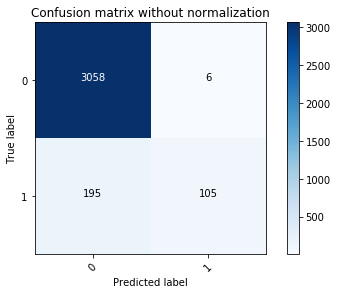

In [35]:
# Compute confusion matrix for KNN
cm = confusion_matrix(y, ypred)
np.set_printoptions(precision=2)
print('Confusion matrix without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
plt.show()

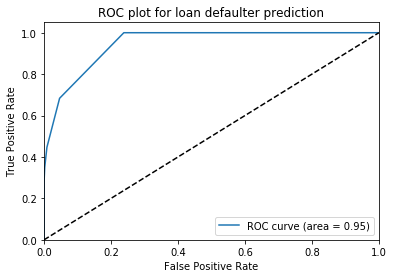

In [36]:
#Plot ROC for KNN
plot_roc(y,y_score)

SVC
==

In [37]:
#import SVM classifier
from sklearn.svm import SVC
model=SVC(probability=True)
param_dict = {'kernel':['rbf','poly'],'degree': [1,2,3], 'C':[0.5,0.75,1],'gamma': [0.01, 0.1, 1]}
#parameters for grid search for SVM are kernel,degree,gamma and C
from sklearn.model_selection import GridSearchCV
#best_model = GridSearchCV(model, param_dict, cv=5, scoring= 'precision') 
best_model = GridSearchCV(model, param_dict, cv=5) 
best_model.fit(X_sub, y)
best_model.best_params_ # {'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
best_model.best_score_ # 0.9316290130796671
ypred = best_model.predict(X_sub)
y_score= best_model.predict_proba(X_sub)

In [38]:
# import Performance measure for SVM
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
acs=accuracy_score(y,ypred) 
rs=recall_score(y,ypred, average='macro') 
ps=precision_score(y,ypred, average='macro')
print("accuracy score : ",acs)
print("precision score : ",rs)
print("recall score : ",ps)

accuracy score :  0.9354934601664685
precision score :  0.6383333333333333
recall score :  0.9669308137762878


Confusion matrix without normalization
[[3064    0]
 [ 217   83]]


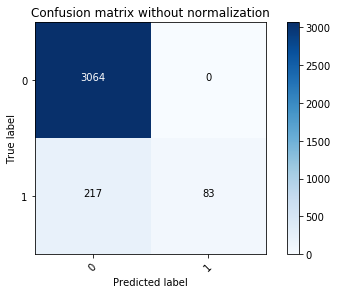

In [39]:
#compute Confusion Matrix for SVC
cm = confusion_matrix(y, ypred)
np.set_printoptions(precision=2)
print('Confusion matrix without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
plt.show()

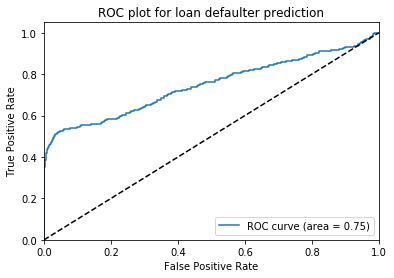

In [40]:
#Plot ROC for SVC
plot_roc(y,y_score)

Decision Tree Classifier
==

In [41]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
param_dict={'min_samples_split' : range(10,500,20),'max_depth': np.arange(3, 10)}
clf=GridSearchCV(model,param_dict, cv=5)
best_model.fit(X, y)
best_model.best_params_ # 
best_model.best_score_ # 0.9316290130796671
ypred = best_model.predict(X)
y_score= best_model.predict_proba(X)
# import Performance measure
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
acs=accuracy_score(y,ypred) 
rs=recall_score(y,ypred, average='macro')  
ps=precision_score(y,ypred, average='macro') 
print("accuracy score : ",acs)
print("precision score : ",rs)
print("recall score : ",ps)

accuracy score :  0.9268727705112961
precision score :  0.59
recall score :  0.9628398791540785


Confusion matrix without normalization
[[3064    0]
 [ 246   54]]


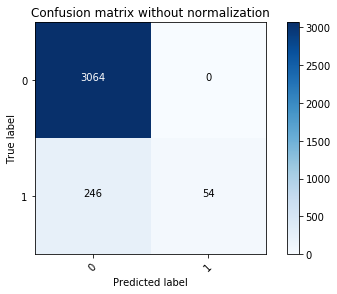

In [42]:
# Compute confusion matrix for Decision Tree
cm = confusion_matrix(y, ypred)
np.set_printoptions(precision=2)
print('Confusion matrix without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

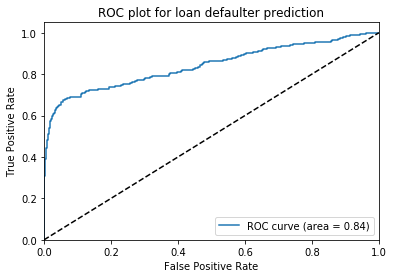

In [43]:
#Plot ROC for Decision Tree
plot_roc(y,y_score)

Feature Importance
==
* Tree methods mathematically determine the splits which effectively helps in distinguishing the classes
* feature_importances_ is an inbuilt attribute that comes with Tree Based Classifiers
* returns an array of scores of each feature’s importance in determining the splits
* the higher the score more important is the feature towards the target variable


DEBTINC           0.328084
CLAGE             0.111754
VALUE             0.109299
DELINQ            0.080500
LOAN              0.080312
CLNO              0.067758
MORTDUE           0.048483
DEROG             0.047683
YOJ               0.037609
NINQ              0.032399
JOB_Office        0.018242
JOB_Other         0.011729
REASON_HomeImp    0.010479
JOB_Self          0.004585
JOB_Sales         0.003839
JOB_Mgr           0.003751
JOB_ProfExe       0.003493
REASON_DebtCon    0.000000
dtype: float64


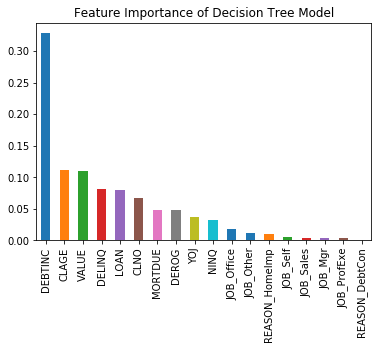

In [44]:
#feature importance of decision tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0) #
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train, y_train) # train the data first for calculating the feature importance
featimp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print (featimp)
featimp.plot(kind='bar', title='Feature Importance of Decision Tree Model')


Random Forest Classifier
==

In [45]:
#import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=-1)
param_dict = { 'n_estimators':[5,10,15],
               'max_depth':[50,60,70],
               'criterion': ['gini','entropy']
              }
#parameters for grid search for Randomforest are n_estimators, max depth and criterion
from sklearn.model_selection import GridSearchCV
best_model = GridSearchCV(model, param_dict, cv=5) 
best_model.fit(X, y)
best_model.best_params_ #{'criterion': 'gini', 'max_depth': 60, 'n_estimators': 10}
best_model.best_score_  #0.9200356718192628
ypred = best_model.predict(X)
y_score= best_model.predict_proba(X)

In [46]:
# import Performance measure
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
acs=accuracy_score(y,ypred) 
rs=recall_score(y,ypred, average='macro') 
ps=precision_score(y,ypred, average='macro')
print("accuracy score : ",acs)
print("precision score : ",rs)
print("recall score : ",ps)

accuracy score :  0.9991082045184304
precision score :  0.995
recall score :  0.9995109227257907


Confusion matrix without normalization
[[3064    0]
 [   3  297]]


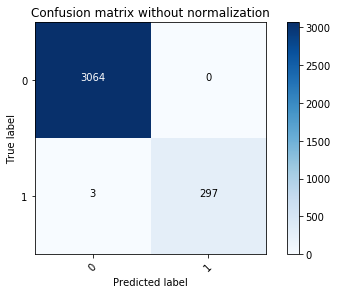

In [47]:
#compute confusion matrix for Random Forest
cm = confusion_matrix(y, ypred)
np.set_printoptions(precision=2)
print('Confusion matrix without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

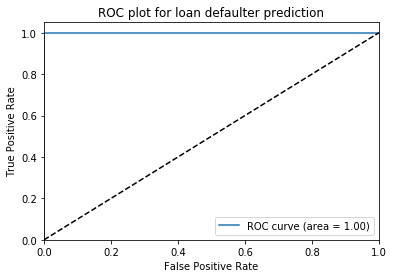

In [48]:
#Plot ROC for Random Forest
plot_roc(y,y_score)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


DEBTINC           0.263386
CLAGE             0.104053
DELINQ            0.096294
VALUE             0.091168
CLNO              0.088885
LOAN              0.074949
MORTDUE           0.073043
DEROG             0.054968
YOJ               0.044482
NINQ              0.041527
JOB_Other         0.011520
JOB_Office        0.010798
JOB_Sales         0.009758
JOB_ProfExe       0.008251
REASON_HomeImp    0.007540
REASON_DebtCon    0.007228
JOB_Mgr           0.007221
JOB_Self          0.004929
dtype: float64


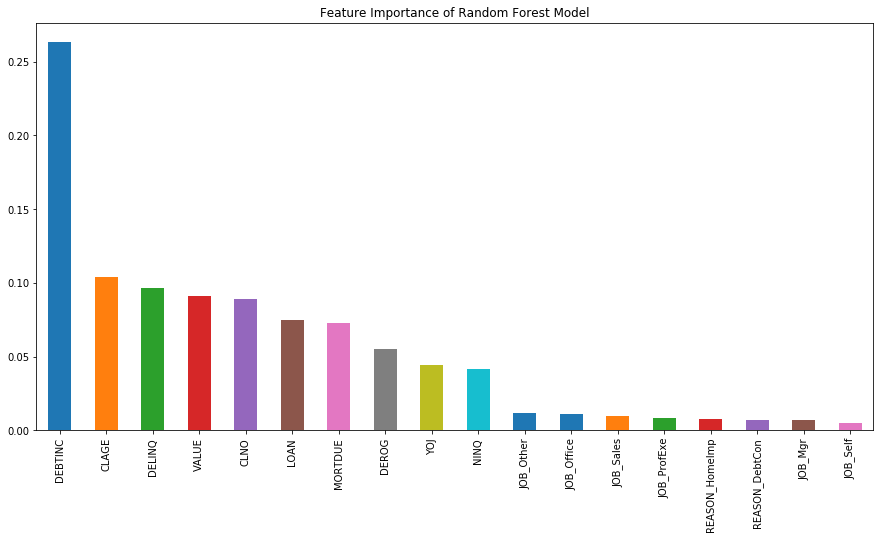

In [49]:
#feature importance of random forest
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0) #
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train) # train the data first for calculating the feature importance
featimp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print (featimp)
featimp.plot(kind='bar', figsize=(15,7.5),title='Feature Importance of Random Forest Model')

Model Comparison on Evaluation Metrics
==

**Model**|**Accuracy**|**Precision**|**Recall **
---|---|---|---
**Logistic Regression**|0.906064209274673|0.8944531696173614|0.5801866256457886
**KNN**|0.9402497027348394|0.9430006397421091|0.6740208877284595
**SVC**|0.9354934601664685|0.9669308137762878|0.6383333333333333
**Random Forest**|0.9925683709869203|0.9583333333333333|0.9959533829718356
**Decision Tree** |0.9268727705112961|0.59|0.9628398791540785







As we can see that the accuracy is above 90% in all the models which gives the impression that all these models are best in predicting the outcome of loan. This is because the target variable is a bit unbalanced(skewed) as zeros are about 80% and ones are about 20%. Hence it is important to consider other performance metrics,such as precision and recall, to evaluate the model.
In this problem False Negative (FN) means that we predicted that a person would not default whereas that person would default. So, it is important to reduce the number of FNs otherwise the models would end up allowing loans for people who are likely to default. On the other hand, False Positive (FP) mean that the model predicts a person to be default who may not default. This is not a major problem as at the end of the day the lender will still be protected from the risk of losing capital. In summary, for this problem we need to reduce the number of FN and to achieve that we must pick a model which has a high Recall as according to the following equation high recall means less FN:

Recall = TP / (TP + FN), where TP = True Positive and FN = False Negative

From the above table, we can see that the random forest model was the most reliable compared to other models as it has the highest recall value of 0.99 and an accuracy of above 90%.


Conclusion
==

* Explored different supervised learning algorithms for classification problems such as logistic regression, KNN, SVM, Decision Tree, Random Forest
* Explored how RFE and Feature Importance gives the best contributing variables in predicting the target variable
* Explored how hyper parameter tuning is done using GridSearchCV to achieve good accuracy 
* logistic Regression produces good accuracy score of 0.906 after doing the feature selection but it did not perform well on other performance metrics(precision and recall)
* KNN  has a good accuracy score but recall score is not good
* SVM also has a good accuracy score but recall score is still bad 
* Overall analysis shows that random forest model worked very well compared to other models as it has a highest recall value of about 0.99. Hence random forest dominated over all the models in this classification problem.